<a href="https://colab.research.google.com/github/dondiana/pp/blob/main/assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/airbnb_data.csv'
airbnb_data = pd.read_csv(file_path)

print("Dataset Head:")
print(airbnb_data.head())

print("\nDataset Info:")
airbnb_data.info()

print("\nDataset Description:")
print(airbnb_data.describe())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Head:
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399  

In [ ]:

missing_values_summary = airbnb_data.isnull().sum()
print("\nMissing Values Summary Before Cleaning:")
print(missing_values_summary)

airbnb_data['name'] = airbnb_data['name'].fillna('Unknown')
airbnb_data['host_name'] = airbnb_data['host_name'].fillna('Unknown')

airbnb_data['last_review'] = airbnb_data['last_review'].fillna('Not Reviewed')

airbnb_data['reviews_per_month'] = airbnb_data['reviews_per_month'].fillna(0)

missing_values_summary_after_cleaning = airbnb_data.isnull().sum()
print("\nMissing Values Summary After Cleaning:")
print(missing_values_summary_after_cleaning)



Missing Values Summary Before Cleaning:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Missing Values Summary After Cleaning:
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude     

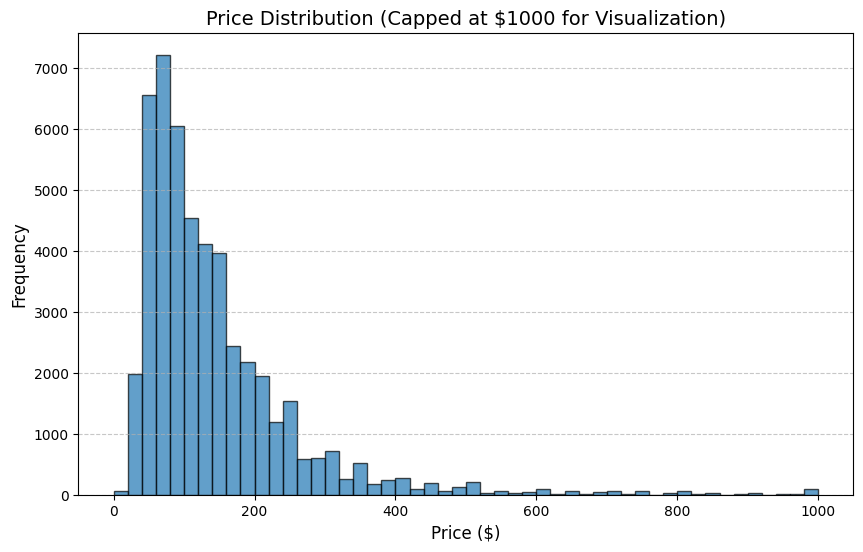

Average Price by Neighborhood Group:
neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

Average Price by Room Type:
room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(airbnb_data['price'], bins=50, range=(0, 1000), edgecolor='k', alpha=0.7)
plt.title('Price Distribution (Capped at $1000 for Visualization)', fontsize=14)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

avg_price_neighborhood = airbnb_data.groupby('neighbourhood_group')['price'].mean()
print("Average Price by Neighborhood Group:")
print(avg_price_neighborhood)

avg_price_room_type = airbnb_data.groupby('room_type')['price'].mean()
print("\nAverage Price by Room Type:")
print(avg_price_room_type)


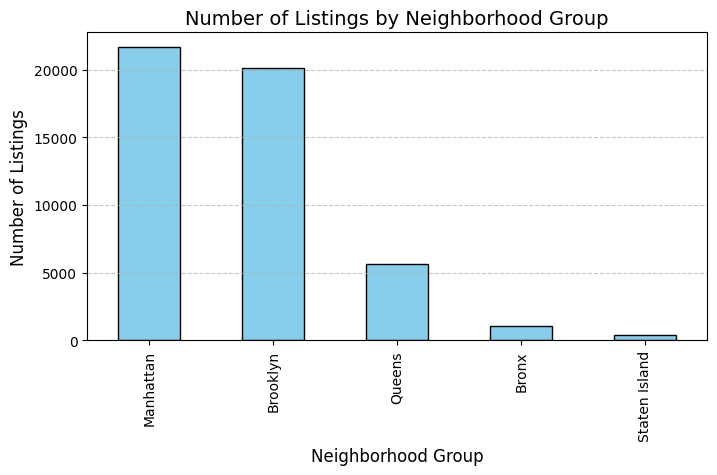

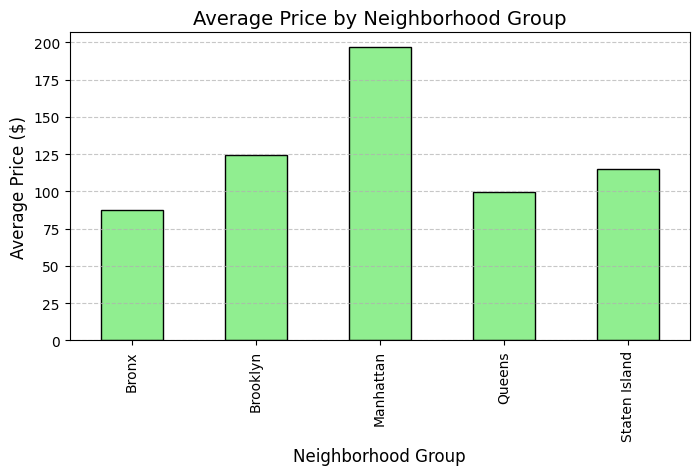

(neighbourhood_group
 Manhattan        21661
 Brooklyn         20104
 Queens            5666
 Bronx             1091
 Staten Island      373
 Name: count, dtype: int64,
 neighbourhood_group
 Bronx             87.496792
 Brooklyn         124.383207
 Manhattan        196.875814
 Queens            99.517649
 Staten Island    114.812332
 Name: price, dtype: float64,
 neighbourhood
 Williamsburg          3920
 Bedford-Stuyvesant    3714
 Harlem                2658
 Bushwick              2465
 Upper West Side       1971
 Hell's Kitchen        1958
 East Village          1853
 Upper East Side       1798
 Crown Heights         1564
 Midtown               1545
 Name: count, dtype: int64)

In [ ]:
import matplotlib.pyplot as plt

listings_count_neighborhood = airbnb_data['neighbourhood_group'].value_counts()

avg_price_neighborhood_group = airbnb_data.groupby('neighbourhood_group')['price'].mean()

popular_neighborhoods = airbnb_data['neighbourhood'].value_counts().head(10)

plt.figure(figsize=(8, 4))

listings_count_neighborhood.plot(kind='bar', color='skyblue', edgecolor='k')
plt.title('Number of Listings by Neighborhood Group', fontsize=14)
plt.xlabel('Neighborhood Group', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(8, 4))

avg_price_neighborhood_group.plot(kind='bar', color='lightgreen', edgecolor='k')
plt.title('Average Price by Neighborhood Group', fontsize=14)
plt.xlabel('Neighborhood Group', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

listings_count_neighborhood, avg_price_neighborhood_group, popular_neighborhoods


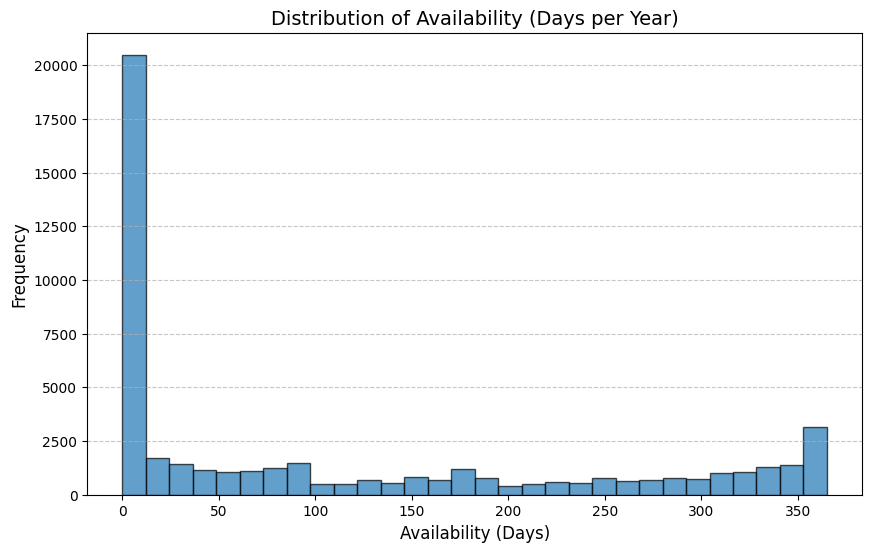


Average Availability by Neighborhood Group:
neighbourhood_group
Bronx            165.758937
Brooklyn         100.232292
Manhattan        111.979410
Queens           144.451818
Staten Island    199.678284
Name: availability_365, dtype: float64

Average Reviews per Month by Neighborhood Group:
neighbourhood_group
Bronx            1.475655
Brooklyn         1.049790
Manhattan        0.976782
Queens           1.567076
Staten Island    1.576381
Name: reviews_per_month, dtype: float64

Correlation between Availability and Number of Reviews:
                   availability_365  number_of_reviews
availability_365           1.000000           0.172028
number_of_reviews          0.172028           1.000000


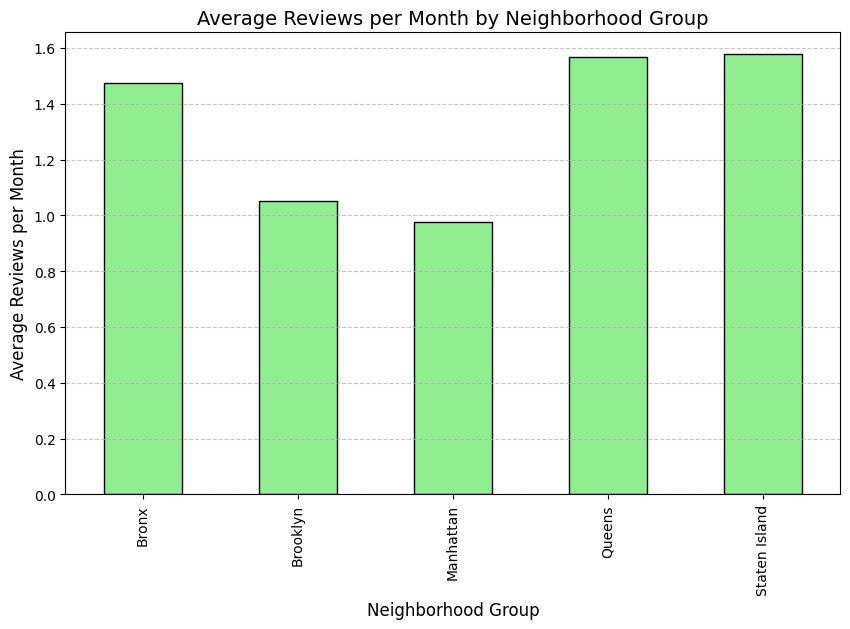

In [ ]:
# Availability and Reviews Analysis
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(airbnb_data['availability_365'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Availability (Days per Year)', fontsize=14)
plt.xlabel('Availability (Days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#availability by Neighborhood Group
avg_availability_neighborhood = airbnb_data.groupby('neighbourhood_group')['availability_365'].mean()
print("\nAverage Availability by Neighborhood Group:")
print(avg_availability_neighborhood)

# average Reviews per Month by Neighborhood Group
avg_reviews_neighborhood = airbnb_data.groupby('neighbourhood_group')['reviews_per_month'].mean()
print("\nAverage Reviews per Month by Neighborhood Group:")
print(avg_reviews_neighborhood)

# correlation between Reviews and Availability
correlation_reviews_availability = airbnb_data[['availability_365', 'number_of_reviews']].corr()
print("\nCorrelation between Availability and Number of Reviews:")
print(correlation_reviews_availability)

# visualizing Average Reviews per Month by Neighborhood Group
plt.figure(figsize=(10, 6))
avg_reviews_neighborhood.plot(kind='bar', color='lightgreen', edgecolor='k')
plt.title('Average Reviews per Month by Neighborhood Group', fontsize=14)
plt.xlabel('Neighborhood Group', fontsize=12)
plt.ylabel('Average Reviews per Month', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


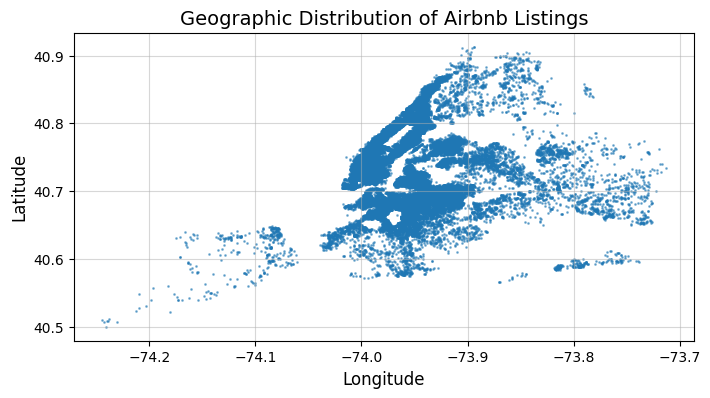

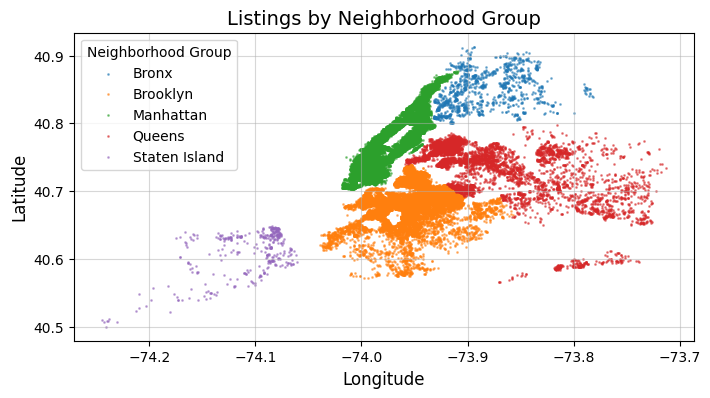

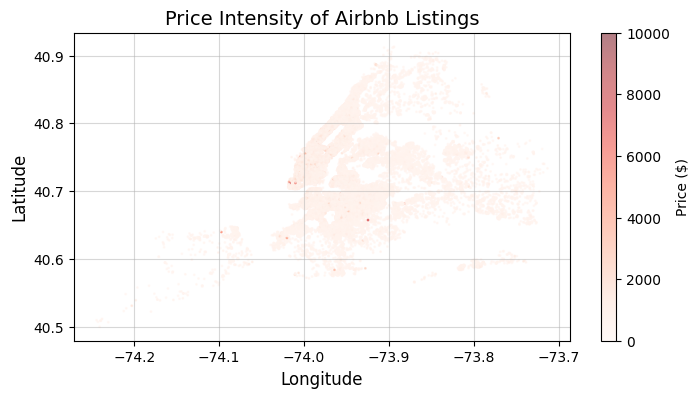

In [ ]:
import matplotlib.pyplot as plt

# scatter Plot for Geographic Spread of Listings
plt.figure(figsize=(8, 4))
plt.scatter(airbnb_data['longitude'], airbnb_data['latitude'], s=1, alpha=0.5)
plt.title('Geographic Distribution of Airbnb Listings', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, alpha=0.5)
plt.show()

# color-Coded Scatter Plot by Neighborhood Group
plt.figure(figsize=(8, 4))
for group, data in airbnb_data.groupby('neighbourhood_group'):
    plt.scatter(data['longitude'], data['latitude'], s=1, alpha=0.5, label=group)
plt.title('Listings by Neighborhood Group', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='Neighborhood Group', loc='upper left')
plt.grid(True, alpha=0.5)
plt.show()

# price Intensity Map
plt.figure(figsize=(8, 4))
plt.scatter(
    airbnb_data['longitude'],
    airbnb_data['latitude'],
    c=airbnb_data['price'],
    cmap='Reds',
    s=1,
    alpha=0.5
)
plt.colorbar(label='Price ($)')
plt.title('Price Intensity of Airbnb Listings', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, alpha=0.5)
plt.show()


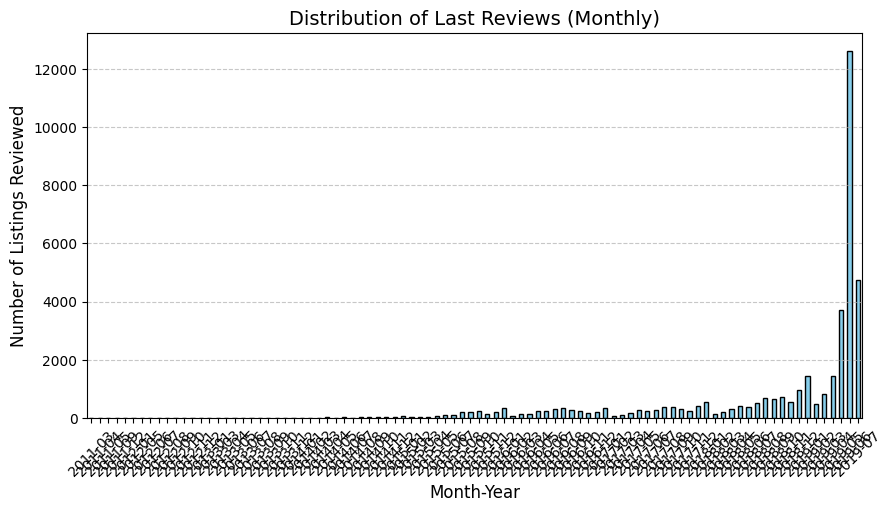

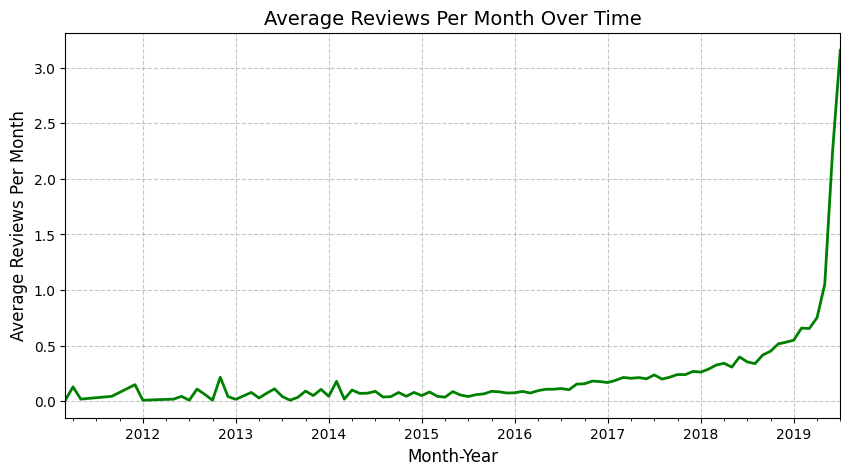

<Figure size 1000x500 with 0 Axes>

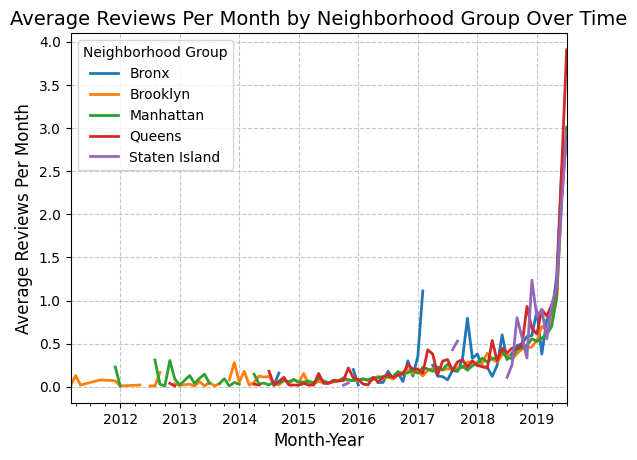

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#`last_review` to datetime
airbnb_data['last_review'] = pd.to_datetime(airbnb_data['last_review'], errors='coerce')

# distribution of Last Reviews
plt.figure(figsize=(10, 5))
airbnb_data['last_review'].dt.to_period('M').value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='k')
plt.title('Distribution of Last Reviews (Monthly)', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Number of Listings Reviewed', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# trends in Reviews Per Month
monthly_reviews = airbnb_data.groupby(airbnb_data['last_review'].dt.to_period('M'))['reviews_per_month'].mean()

plt.figure(figsize=(10, 5))
monthly_reviews.plot(color='green', linewidth=2)
plt.title('Average Reviews Per Month Over Time', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Average Reviews Per Month', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

# reviews Per Month by Neighborhood Group Over Time
neighborhood_reviews = airbnb_data.groupby(
    [airbnb_data['last_review'].dt.to_period('M'), 'neighbourhood_group']
)['reviews_per_month'].mean().unstack()

plt.figure(figsize=(10, 5))
neighborhood_reviews.plot(kind='line', linewidth=2)
plt.title('Average Reviews Per Month by Neighborhood Group Over Time', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Average Reviews Per Month', fontsize=12)
plt.legend(title='Neighborhood Group', loc='upper left')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()
